In [1]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random
import time
from tqdm import trange
from stardate.lhf import gk_rotation_model
import stardate
from itertools import product

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [2]:
df_predict=pd.read_pickle('KinageAllKepler_cut.pkl')
df_random=pd.read_pickle('KinageAllKepler_cut_random.pkl')

In [3]:
dfMc=pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_2_Non_Periodic.txt',delimiter=',')

In [4]:
df_measure=pd.read_pickle('df_ruth.pkl')

In [5]:
df_random['Prot_random']=df_random['Prot_predict']

In [6]:
df_both=pd.merge(df_predict[['KID','Prot_predict','v_b','kin_age']],df_random[['KID','Prot_random']],left_on='KID',right_on='KID',how='inner')
df_both=df_both.loc[~df_both['KID'].isin(df_measure['KID'])]
df_both=pd.merge(df_both,dfMc[['KID','w']],left_on='KID',right_on='KID',how='inner')

df_isoages=pd.read_table('GKSPCPapTable2.txt',delimiter='&')
df_both=pd.merge(df_isoages[['KIC','iso_age']],df_both,left_on='KIC',right_on='KID',how='inner')
    
np.shape(df_both)


(38525, 8)

Text(0, 0.5, 'random')

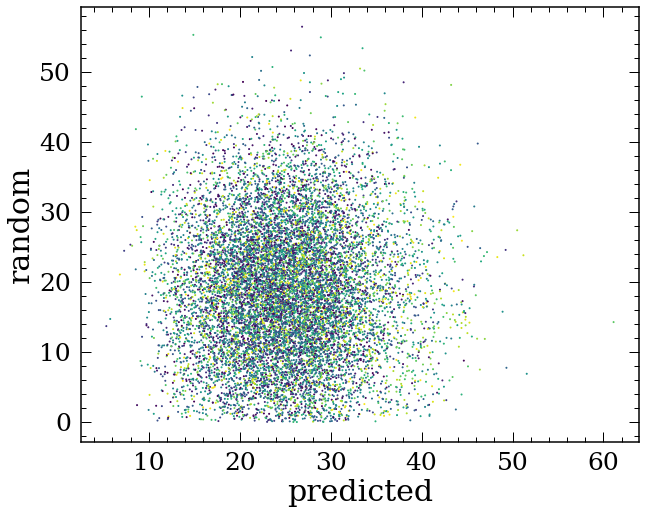

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(df_both['Prot_predict'],df_both['Prot_random'],c=df_both['w'],s=1)
plt.xlabel('predicted')
plt.ylabel('random')

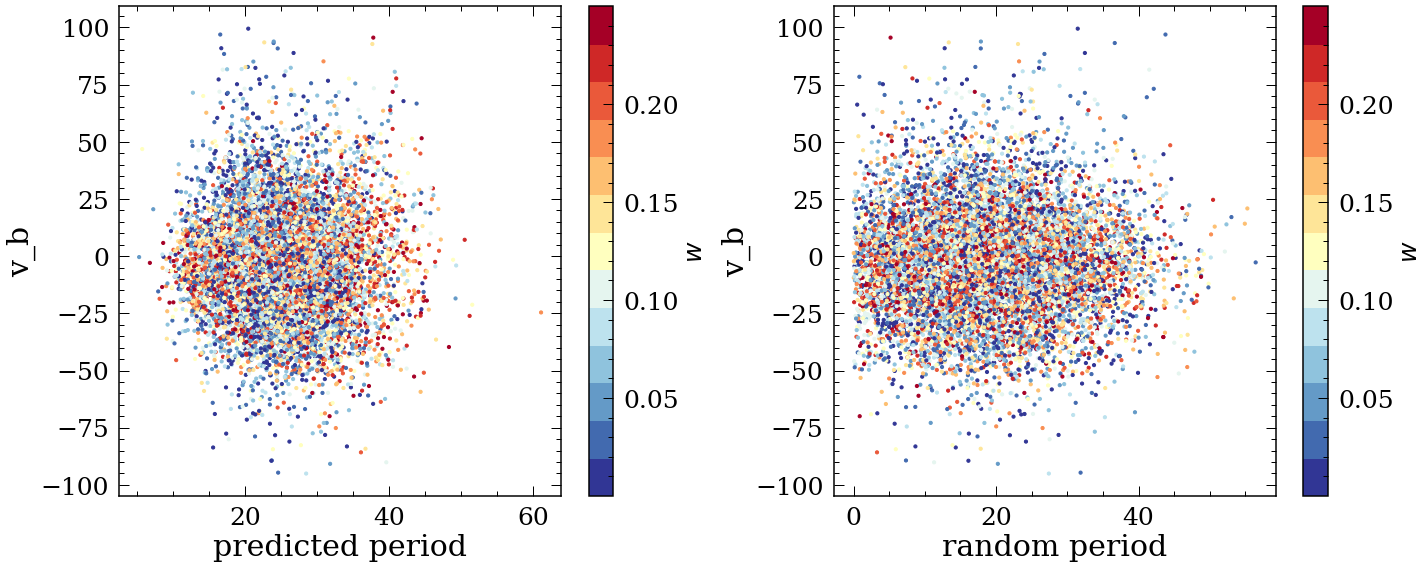

In [8]:
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both['Prot_predict'],df_both['v_b'],c=df_both['w'],s=10,cmap=cmap1)
plt.xlabel('predicted period')
plt.ylabel('v_b')
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both['Prot_random'],df_both['v_b'],c=df_both['w'],s=10,cmap=cmap1)
plt.xlabel('random period')
plt.ylabel('v_b')
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.tight_layout()

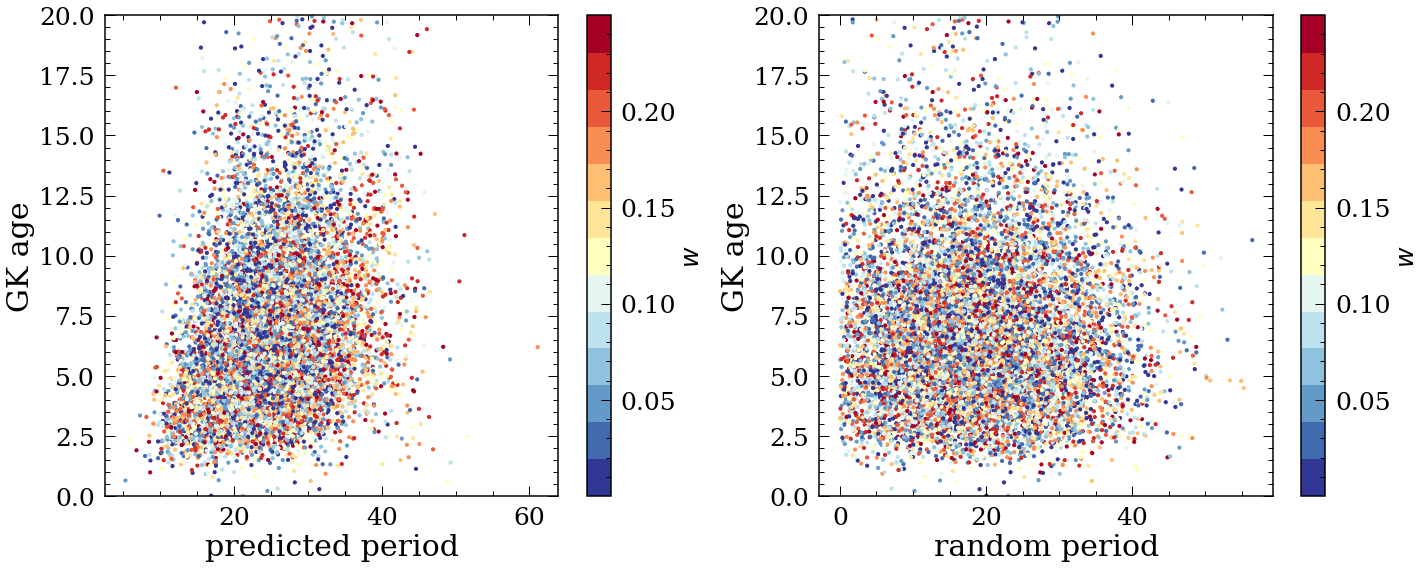

In [9]:
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both['Prot_predict'],df_both['kin_age'],c=df_both['w'],s=10,cmap=cmap1)
plt.xlabel('predicted period')
plt.ylabel('GK age')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both['Prot_random'],df_both['kin_age'],c=df_both['w'],s=10,cmap=cmap1)
plt.xlabel('random period')
plt.ylabel('GK age')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)


plt.tight_layout()

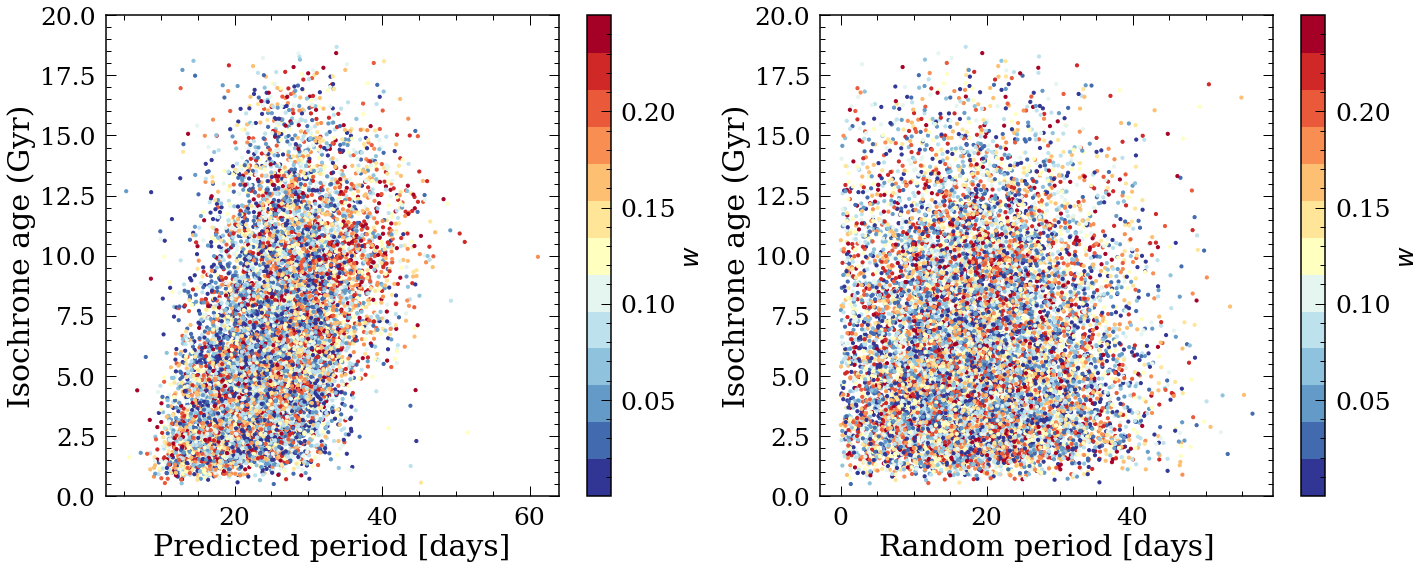

In [10]:
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both['Prot_predict'],df_both['iso_age'],c=df_both['w'],s=10,cmap=cmap1)
plt.xlabel('Predicted period [days]')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both['Prot_random'],df_both['iso_age'],c=df_both['w'],s=10,cmap=cmap1)
plt.xlabel('Random period [days]')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.tight_layout()
plt.savefig('All_weight_periodage.png')

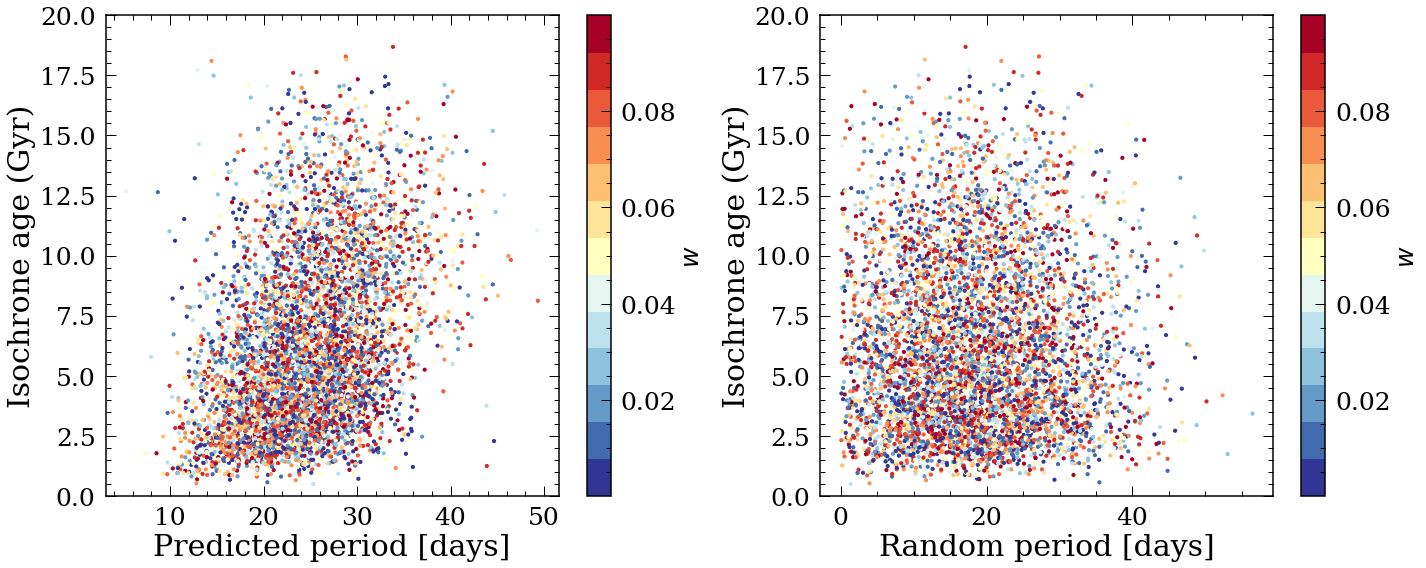

In [14]:
df_both_loww=df_both.loc[df_both['w']<0.1]
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both_loww['Prot_predict'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('Predicted period [days]')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both_loww['Prot_random'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('Random period [days]')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)
plt.tight_layout()
plt.savefig('small_weight_periodage.png')

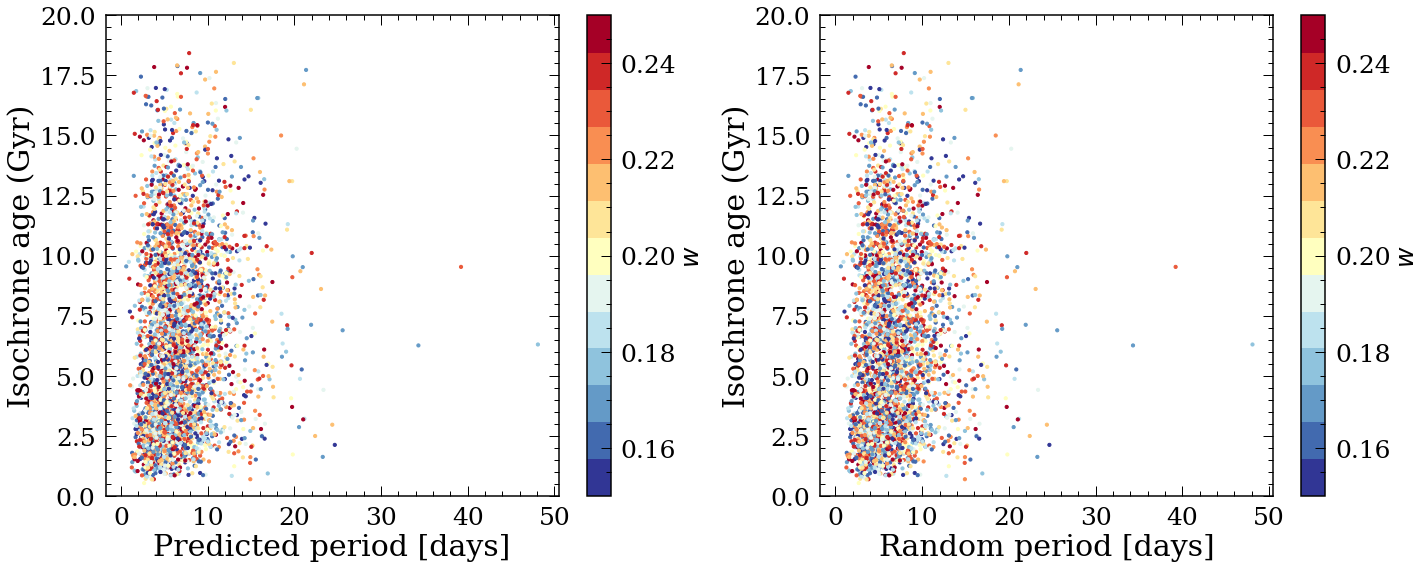

In [15]:
df_both_loww=df_both.loc[df_both['w']>0.15]
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both_loww['Prot_predict'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('Predicted period [days]')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both_loww['Prot_random'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('Random period [days]')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)
plt.tight_layout()
plt.savefig('high_weight_periodage.png')

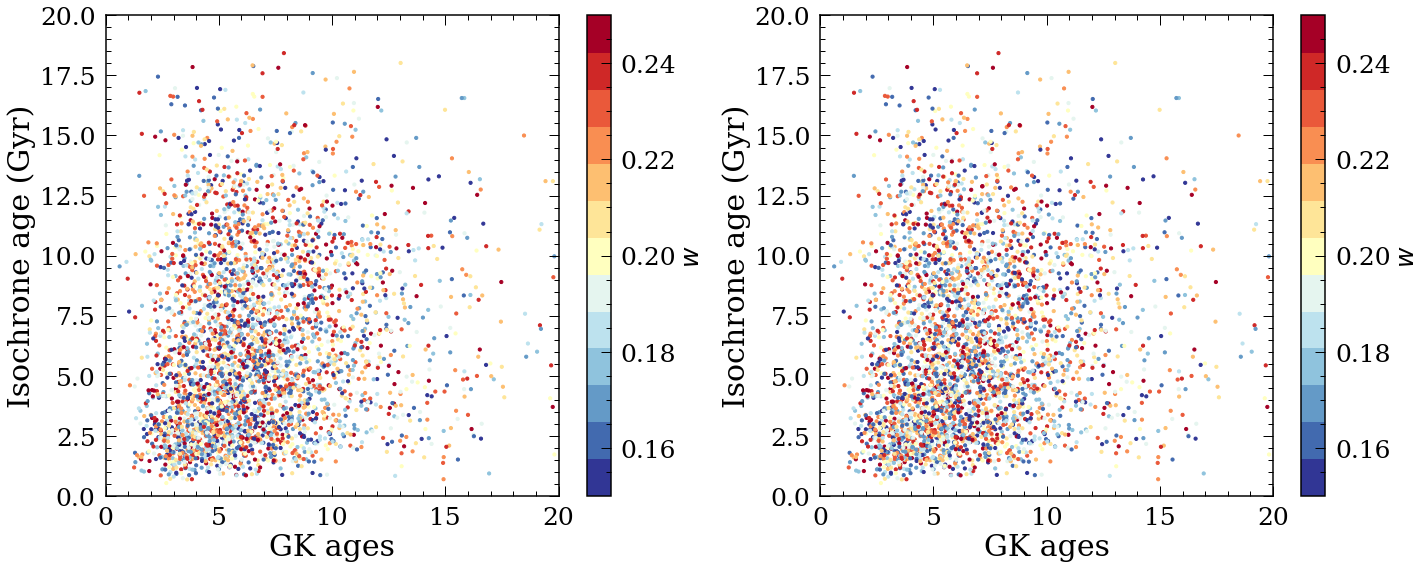

In [16]:
df_both_loww=df_both.loc[df_both['w']>0.15]
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both_loww['kin_age'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('GK ages')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
plt.xlim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both_loww['kin_age'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('GK ages')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
plt.xlim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)
plt.tight_layout()
plt.savefig('high_weight_periodage.png')

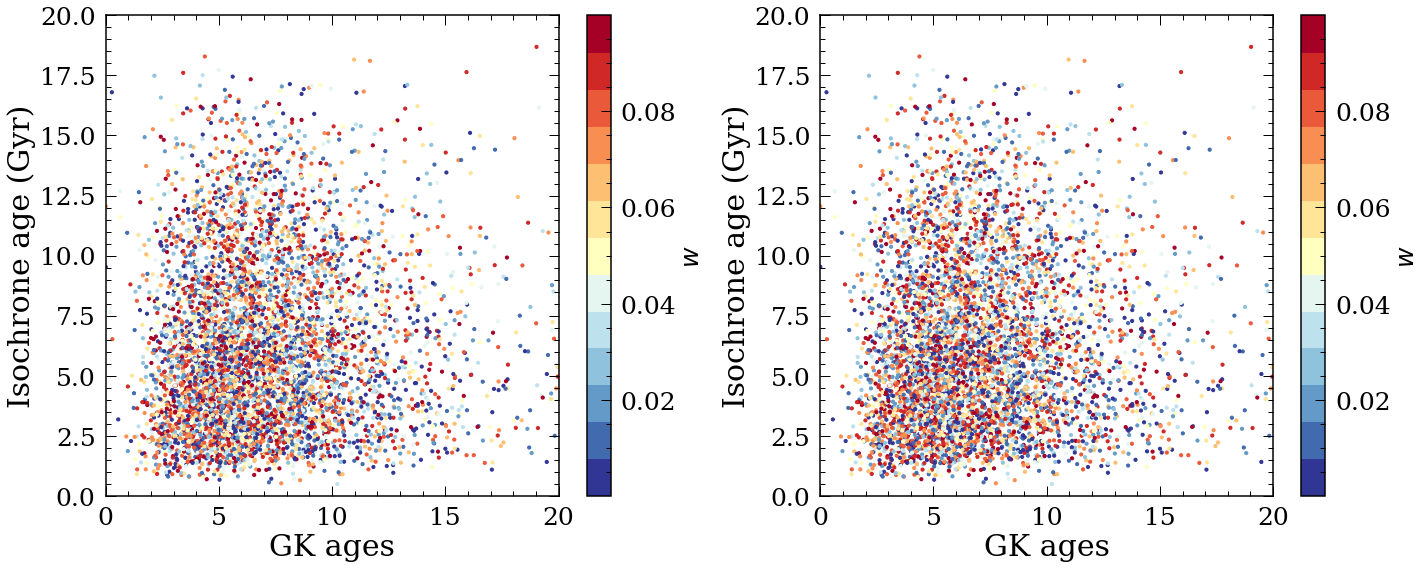

In [18]:
df_both_loww=df_both.loc[df_both['w']<0.10]
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_both_loww['kin_age'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('GK ages')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
plt.xlim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both_loww['kin_age'],df_both_loww['iso_age'],c=df_both_loww['w'],s=10,cmap=cmap1)
plt.xlabel('GK ages')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
plt.xlim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)
plt.tight_layout()
plt.savefig('high_weight_periodage.png')

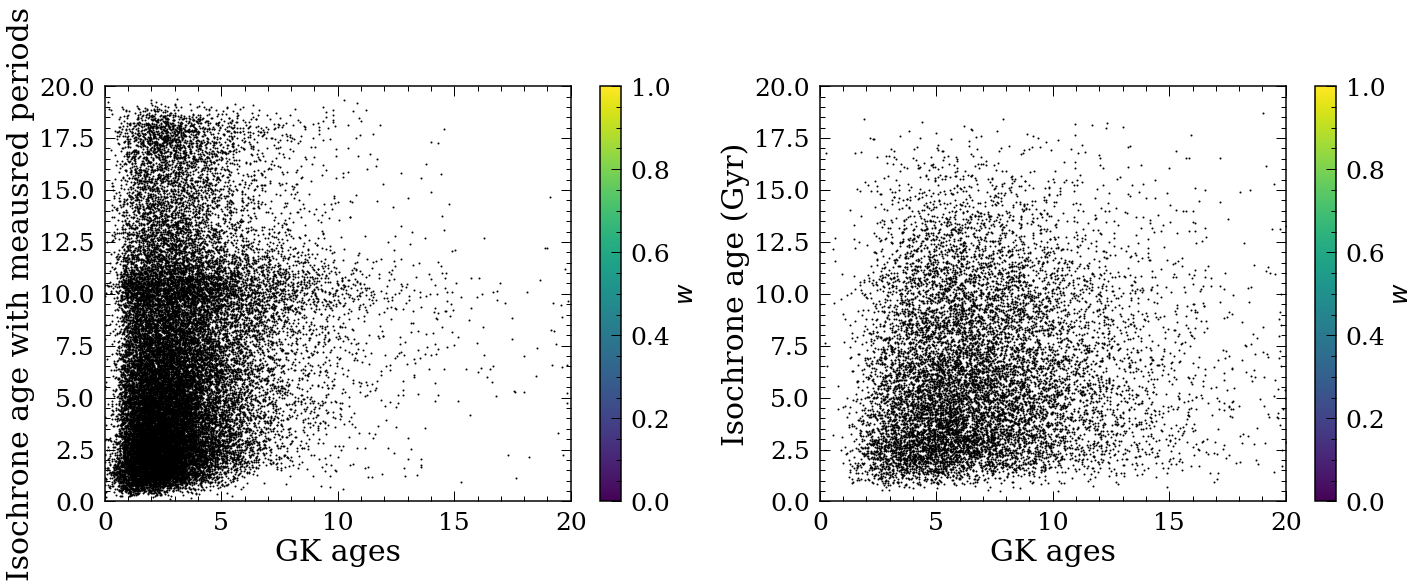

In [24]:
df_both_loww=df_both.loc[df_both['w']>0.0]
plt.figure(figsize=(20,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.subplot(1,2,1)
plt.scatter(df_measure['kin_age'],df_measure['iso_age'],c='k',s=1)
plt.xlabel('GK ages')
plt.ylabel('Isochrone age with meausred periods')
plt.ylim([0,20])
plt.xlim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)

plt.subplot(1,2,2)
plt.scatter(df_both_loww['kin_age'],df_both_loww['iso_age'],c='k',s=1)
plt.xlabel('GK ages')
plt.ylabel('Isochrone age (Gyr)')
plt.ylim([0,20])
plt.xlim([0,20])
cb=plt.colorbar()
cb.set_label('$w$',fontsize = 25,labelpad = 5)
plt.tight_layout()
plt.savefig('high_weight_periodage.png')
